In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def parse_natality(natalitydata, datadictionary):
    '''Take in pandas dataframe natalitydata and list-of-lists datadictionary
    (for example [[43, 44, "MATERNALAGE"]] ) and return a pandas dataframe (same 
    number of rows) with labeled columns  '''
    df = pd.DataFrame()
    for start, stop, column_name in datadictionary:
        # Get the first column (start)
        df[column_name] = natalitydata[0].str.get(start-1)
        # Get the remaining columns
        for i in range(1, stop-start + 1):
            df[column_name]=  df[column_name].str.cat(natalitydata[0].str.get(start-1+i))
    for start, stop, column_name in datadictionary:
        try:
            df[column_name] = pd.to_numeric(df[column_name])
        except ValueError:
            pass
    return df

In [3]:
# https://www.cdc.gov/nchs/data_access/vitalstatsonline.htm 
# This notebook uses Nat2003us.dat, the 2003 data file for the US,
# https://ftp.cdc.gov/pub/Health_Statistics/NCHS/Datasets/DVS/natality/

# Read just the first thousand lines of the 4M line dataset into a pandas frame 
n2003s = pd.read_csv("~/Downloads/birth/Nat03us.dat", header=None, nrows=1000)

In [4]:
# Load in a file of three columns into a list of lists, the first two elements of which are integers.
# This is our table of column positions and column names
key2003 = []
for line in open("KEY2003.txt"):
    fields = line.strip().split()
    key2003.append([int(fields[0]), int(fields[1]), fields[2]])
key2003


[[138, 138, 'RESIDENTSTATUS'],
 [30, 31, 'STATEOFRESIDENCE'],
 [133, 133, 'POPULATIONSIZECITY'],
 [436, 436, 'SEX'],
 [408, 408, 'ATTENDANTTYPE'],
 [42, 42, 'PLACE'],
 [395, 395, 'METHOD'],
 [290, 290, 'TOBACCOUSE'],
 [141, 142, 'RACEOFMOTHER'],
 [77, 78, 'MATERNALAGE'],
 [176, 177, 'PATERNALAGE'],
 [463, 466, 'WEIGHTGRAMS'],
 [29, 29, 'DAYOFWEEK'],
 [19, 20, 'BIRTH'],
 [155, 155, 'MEDUC'],
 [153, 153, 'MARRIED'],
 [141, 142, 'MRACE']]

In [5]:
df = parse_natality(n2003s, key2003)
df.WEIGHTGRAMS[0]

3093

(array([  9.,  31., 391., 530.,  38.,   0.,   0.,   0.,   0.,   1.]),
 array([ 510. , 1458.9, 2407.8, 3356.7, 4305.6, 5254.5, 6203.4, 7152.3,
        8101.2, 9050.1, 9999. ]),
 <BarContainer object of 10 artists>)

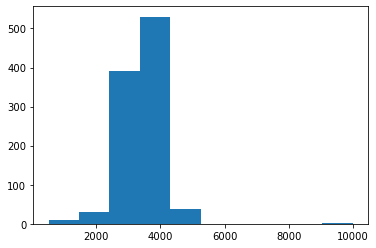

In [6]:
plt.hist((df.WEIGHTGRAMS))

In [7]:
df["METHOD"].value_counts()

1    775
2    219
9      5
8      1
Name: METHOD, dtype: int64

In [8]:
df["MATERNALAGE"].value_counts()

99    1000
Name: MATERNALAGE, dtype: int64

In [9]:
n2003 = pd.read_csv("~/Downloads/birth/Nat03us.dat", header=None)
n2003.shape

(4096092, 1)

In [10]:
bigdf = parse_natality(n2003, key2003)

In [11]:
bigdf.shape

(4096092, 17)

<AxesSubplot:>

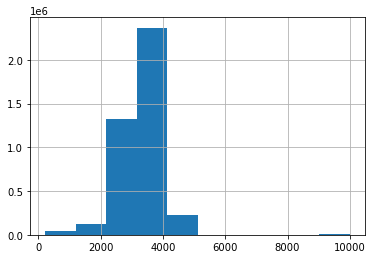

In [12]:
bigdf.WEIGHTGRAMS.hist()

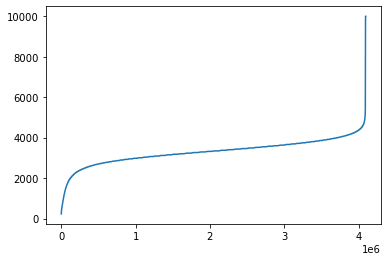

In [13]:
plt.plot(np.sort(bigdf.WEIGHTGRAMS))


In [14]:
(bigdf.WEIGHTGRAMS > 5000).sum()

9011

(array([4.735e+03, 5.210e+02, 1.060e+02, 1.700e+01, 1.200e+01, 4.000e+00,
        3.000e+00, 0.000e+00, 0.000e+00, 3.613e+03]),
 array([5002. , 5501.7, 6001.4, 6501.1, 7000.8, 7500.5, 8000.2, 8499.9,
        8999.6, 9499.3, 9999. ]),
 <BarContainer object of 10 artists>)

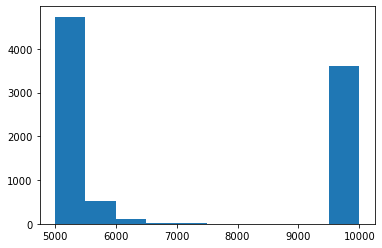

In [15]:
plt.hist(bigdf.iloc[np.where(bigdf.WEIGHTGRAMS > 5000)].WEIGHTGRAMS)

In [16]:
# Oh, that's not mis-coded weight in pounds, that's the missing-data indicator.
# Great.  Let's drop those rows.
print(bigdf.shape)
bigdf.WEIGHTGRAMS.loc[bigdf.WEIGHTGRAMS == 9999] = np.nan
bigdf.dropna(subset="WEIGHTGRAMS", inplace=True)
print(bigdf.shape)


(4096092, 17)


/var/folders/mx/y31t86kn4_xbvbmf4k8f7xd00000gp/T/ipykernel_25535/2757604990.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bigdf.WEIGHTGRAMS.loc[bigdf.WEIGHTGRAMS == 9999] = np.nan


(4092479, 17)


In [17]:
bigdf.shape

(4092479, 17)

Text(0.5, 0, 'Birth weight (grams)')

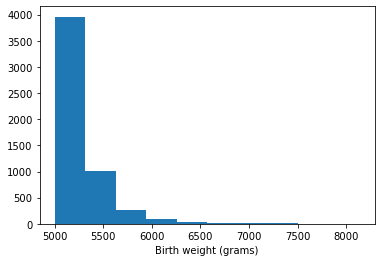

In [69]:
plt.hist(bigdf.iloc[np.where(bigdf.WEIGHTGRAMS > 5000)].WEIGHTGRAMS)
plt.xlabel("Birth weight (grams)")


In [19]:
bigdf.groupby(["SEX", "DAYOFWEEK", "METHOD"]).MATERNALAGE.count()

SEX  DAYOFWEEK  METHOD
F    1          1         154874
                2          35889
                8            336
                9            522
     2          1         211720
                2          85345
                8            434
                9           1442
     3          1         235146
                2          92995
                8            499
                9           1707
     4          1         233006
                2          90610
                8            465
                9           1614
     5          1         227927
                2          88279
                8            446
                9           1541
     6          1         221338
                2          91582
                8            416
                9           1618
     7          1         173599
                2          43312
                8            369
                9            676
M    1          1         158718
                2   

I should look into this "METHOD" data dictionary...

    1  No Caesarian (Vaginal delivery)
    2  Caesarian delivery
    8  Not on certificate
    9  Unknown (but somehow different from 8)

In [20]:
dow_method = bigdf.groupby(["DAYOFWEEK", "METHOD"]).MATERNALAGE.count()
dow_method.unstack()

METHOD,1,2,8,9
DAYOFWEEK,,,,
1,313592,78091,679,1199
2,427100,179213,901,3335
3,475188,196649,1024,3664
4,472040,191494,968,3595
5,460615,186158,919,3446
6,447298,193094,881,3594
7,351446,93959,757,1580


In [21]:
sex_method = bigdf.groupby(["SEX", "METHOD"]).MATERNALAGE.count()
sex_method

SEX  METHOD
F    1         1457610
     2          528012
     8            2965
     9            9120
M    1         1489669
     2          590646
     8            3164
     9           11293
Name: MATERNALAGE, dtype: int64

In [22]:
sex_method.groupby("SEX").sum()

SEX
F    1997707
M    2094772
Name: MATERNALAGE, dtype: int64

In [23]:
F_caesar = 528012 / 1997707
M_caesar = 590646 / 2094772
T_caesar = (590646 + 528012) / (1997707+ 2094772)
F_caesar, M_caesar, T_caesar


(0.26430903030324265, 0.2819619509903703, 0.27334483573403795)

Completely reasonable question:  Is this difference meaningful?

    Null hypothesis: assume rate, check observed against sampling dist w/assumption
    Bootstrap: draw repeated samples of the same size
    Bayesian inference: assign probability distribution to the paramter of interest.
   
No reason we can't demonstrate with all three, though bootstrapping with samples of size 4M is not going to be fun.

In [24]:
from scipy.stats import binom
nulldistM = binom.rvs( n = 2094772, p = T_caesar, size=10000)

Text(0, 0.5, 'Number of simulations')

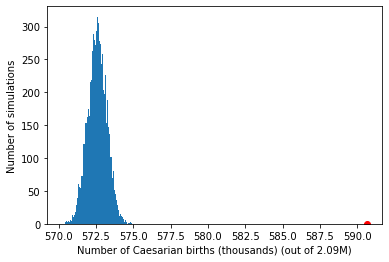

In [70]:
plt.hist(nulldistM/1000, bins=100)
plt.scatter(  590646/1000,0, color="red")
plt.xlabel("Number of Caesarian births (thousands) (out of 2.09M)") 
plt.ylabel("Number of simulations")

In [26]:
# the scipy.stats.binom object has methods for CDF and 1-CDF: 
prob_lessthan = binom.cdf( n = 2094772, p = T_caesar, k=590646)
prob_lessthan

1.0

In [27]:
# Well that doesn't help much.   SF = 1-CDF but is calculated differently
prob_moreextreme = binom.sf( n = 2094772, p = T_caesar, k=590646)
prob_moreextreme

1.541845058425729e-171

In [28]:
# Take that, strawman null hypothesis. 

In [29]:
       
0.2819619509903703 - 0.26430903030324265 

0.01765292068712765

In [30]:
# So boys have a higher rate of Caesarian deliveries than girls, 
# by 0.281962- 0.264309 or 1.8%. 

In [31]:
state_sex_method = bigdf.groupby(["STATEOFRESIDENCE", "SEX", "METHOD"]).MATERNALAGE.count().unstack()
state_sex_method

METHOD                      1       2    8      9
STATEOFRESIDENCE SEX                             
AK               F     3816.0  1000.0  1.0    9.0
                 M     4010.0  1116.0  3.0   12.0
AL               F    20309.0  8046.0  NaN  164.0
                 M    20484.0  9173.0  NaN  196.0
AR               F    12855.0  5125.0  2.0   48.0
...                       ...     ...  ...    ...
WI               M    27222.0  7876.0  5.0    2.0
WV               F     7171.0  3167.0  2.0   34.0
                 M     7471.0  3571.0  1.0   43.0
WY               F     2250.0   705.0  1.0    4.0
                 M     2530.0   706.0  NaN    6.0

[102 rows x 4 columns]

In [32]:
state_den = bigdf.groupby("STATEOFRESIDENCE").MATERNALAGE.count()

In [33]:
state_sex_method["TOT"]= state_sex_method[[1,2,8,9]].sum(axis=1)
state_sex_method["Caesarratio"] = state_sex_method[2] / state_sex_method["TOT"]
state_sex_method

METHOD                      1       2    8      9      TOT  Caesarratio
STATEOFRESIDENCE SEX                                                   
AK               F     3816.0  1000.0  1.0    9.0   4826.0     0.207211
                 M     4010.0  1116.0  3.0   12.0   5141.0     0.217078
AL               F    20309.0  8046.0  NaN  164.0  28519.0     0.282128
                 M    20484.0  9173.0  NaN  196.0  29853.0     0.307272
AR               F    12855.0  5125.0  2.0   48.0  18030.0     0.284248
...                       ...     ...  ...    ...      ...          ...
WI               M    27222.0  7876.0  5.0    2.0  35105.0     0.224356
WV               F     7171.0  3167.0  2.0   34.0  10374.0     0.305282
                 M     7471.0  3571.0  1.0   43.0  11086.0     0.322118
WY               F     2250.0   705.0  1.0    4.0   2960.0     0.238176
                 M     2530.0   706.0  NaN    6.0   3242.0     0.217767

[102 rows x 6 columns]

In [34]:

Mrows = state_sex_method.loc[pd.IndexSlice[:, 'M'], :]
Frows = state_sex_method.loc[pd.IndexSlice[:, 'F'], :]
Mrows.head()


,METHOD,1,2,8,9,TOT,Caesarratio
STATEOFRESIDENCE,SEX,,,,,,
AK,M,4010.0,1116.0,3.0,12.0,5141.0,0.217078
AL,M,20484.0,9173.0,NaN,196.0,29853.0,0.307272
AR,M,13193.0,5810.0,NaN,85.0,19088.0,0.304380
AZ,M,35361.0,10499.0,302.0,251.0,46413.0,0.226208
CA,M,197307.0,79742.0,348.0,NaN,277397.0,0.287465


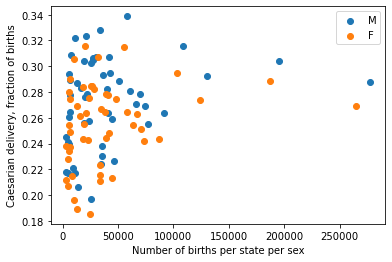

In [35]:
plt.scatter(Mrows.TOT, Mrows.Caesarratio, label="M")
plt.scatter(Frows.TOT, Frows.Caesarratio, label="F")
plt.xlabel("Number of births per state per sex")
plt.ylabel("Caesarian delivery, fraction of births")
plt.legend()

In [36]:
# The variance for a binomial distribution is np(1-p), and for np(1-p) > 30 
# the binomial distirbution is very close to the normal distribution.  So 
# let's take the normal approximation to the binomial and calculate 
# sampling errors on the counts.  Then divide by total, get sampling errors 
# on the per-state per-sex point estimates of Caesarian rate.

# Disaggregating reduces our sensitivity to small effects ,and this was an
# effect less than 2% (on a 20% background).

# We should not be able to see an effect at all when sqrt ( ( p (1-p) ) / n ) = .02


$$ \sqrt { {p (1-p) \over n} } = .02 $$
$$n = {.18 * .72 \over (.02)^2} $$ 
n=324 

In [37]:
.18*.72 / .02/.02

323.99999999999994

In [38]:
state_sex_method["Stddevbinom"] = np.sqrt(state_sex_method.Caesarratio * (1-state_sex_method.Caesarratio) * state_sex_method.TOT)
state_sex_method["Stddevratio"] = state_sex_method["Stddevbinom"]/ state_sex_method.TOT

In [39]:
state_sex_method

METHOD                      1       2    8      9      TOT  Caesarratio  \
STATEOFRESIDENCE SEX                                                      
AK               F     3816.0  1000.0  1.0    9.0   4826.0     0.207211   
                 M     4010.0  1116.0  3.0   12.0   5141.0     0.217078   
AL               F    20309.0  8046.0  NaN  164.0  28519.0     0.282128   
                 M    20484.0  9173.0  NaN  196.0  29853.0     0.307272   
AR               F    12855.0  5125.0  2.0   48.0  18030.0     0.284248   
...                       ...     ...  ...    ...      ...          ...   
WI               M    27222.0  7876.0  5.0    2.0  35105.0     0.224356   
WV               F     7171.0  3167.0  2.0   34.0  10374.0     0.305282   
                 M     7471.0  3571.0  1.0   43.0  11086.0     0.322118   
WY               F     2250.0   705.0  1.0    4.0   2960.0     0.238176   
                 M     2530.0   706.0  NaN    6.0   3242.0     0.217767   

METHOD                Stddevbinom  Stddevratio  
STATEOFRESIDENCE SEX                            
AK               F      28.156510     0.005834  
                 M      29.559102     0.005750  
AL               F      76.000003     0.002665  
                 M      79.714435     0.002670  
AR               F      60.565886     0.003359  
...                           ...          ...  
WI               M      78.159939     0.002226  
WV               F      46.905975     0.004521  
                 M      49.200779     0.004438  
WY               F      23.175119     0.007829  
                 M      23.500141     0.007249  

[102 rows x 8 columns]

Text(0, 0.5, "Caesarian rate'")

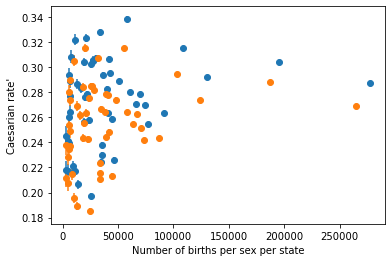

In [40]:

# This disaggregates the newly-calculated standard error of the ratio column
Mrows = state_sex_method.loc[pd.IndexSlice[:, 'M'], :]
Frows = state_sex_method.loc[pd.IndexSlice[:, 'F'], :]
Mrows.head()


plt.errorbar(Mrows.TOT, Mrows.Caesarratio, yerr=Mrows.Stddevratio, fmt="o")
plt.errorbar(Frows.TOT, Frows.Caesarratio, yerr=Frows.Stddevratio, fmt="o")
plt.xlabel("Number of births per sex per state")
plt.ylabel("Caesarian rate'")

In [41]:
# This looks funny.. The dots come in pairs.  I ought to plot the difference 

flat_state_sex_method = state_sex_method.pivot_table(index="STATEOFRESIDENCE", columns="SEX", values=["Caesarratio", "TOT", "Stddevratio"])
flat_state_sex_method["TOTAL"] =flat_state_sex_method["TOT"]["M"]+flat_state_sex_method["TOT"]["F"]
flat_state_sex_method["RATIODIFF"] =flat_state_sex_method["Caesarratio"]["M"]-flat_state_sex_method["Caesarratio"]["F"]

flat_state_sex_method

METHOD           Caesarratio           Stddevratio                 TOT  \
SEX                        F         M           F         M         F   
STATEOFRESIDENCE                                                         
AK                  0.207211  0.217078    0.005834  0.005750    4826.0   
AL                  0.282128  0.307272    0.002665  0.002670   28519.0   
AR                  0.284248  0.304380    0.003359  0.003331   18030.0   
AZ                  0.213358  0.226208    0.001940  0.001942   44573.0   
CA                  0.269124  0.287465    0.000863  0.000859  264358.0   
CO                  0.215299  0.230325    0.002234  0.002230   33846.0   
CT                  0.263607  0.278428    0.003026  0.003002   21202.0   
DC                  0.289920  0.308390    0.005372  0.005334    7133.0   
DE                  0.280201  0.294022    0.005817  0.005807    5960.0   
FL                  0.294724  0.315357    0.001419  0.001407  103239.0   
GA                  0.262620  0.278580    0.001697  0.001695   67234.0   
HI                  0.214542  0.221273    0.004417  0.004262    8637.0   
IA                  0.243609  0.255994    0.003133  0.003117   18776.0   
ID                  0.195782  0.217068    0.003894  0.003951   10384.0   
IL                  0.243838  0.263361    0.001454  0.001454   87226.0   
IN                  0.248401  0.258732    0.002103  0.002075   42214.0   
KS                  0.255369  0.276095    0.003103  0.003117   19744.0   
KY                  0.284681  0.304723    0.002792  0.002791   26131.0   
LA                  0.307384  0.327938    0.002583  0.002570   31908.0   
MA                  0.278653  0.306856    0.002253  0.002261   39612.0   
MD                  0.266727  0.293548    0.002387  0.002386   34316.0   
ME                  0.248750  0.277329    0.005321  0.005331    6601.0   
MI                  0.254516  0.270355    0.001732  0.001721   63226.0   
MN                  0.223390  0.237875    0.002256  0.002248   34075.0   
MO                  0.264141  0.282426    0.002263  0.002254   37938.0   
MS                  0.315547  0.323602    0.003273  0.003221   20165.0   
MT                  0.234358  0.239725    0.005664  0.005598    5594.0   
NC                  0.264347  0.280392    0.001834  0.001816   57799.0   
ND                  0.228181  0.240935    0.006184  0.006321    4606.0   
NE                  0.268939  0.286842    0.003943  0.003903   12646.0   
NH                  0.237246  0.264530    0.005143  0.005264    6841.0   
NJ                  0.315148  0.338806    0.001971  0.001961   55577.0   
NM                  0.189119  0.206464    0.003378  0.003446   13436.0   
NV                  0.261731  0.283168    0.003454  0.003456   16196.0   
NY                  0.273825  0.292645    0.001265  0.001259  124185.0   
OH                  0.242151  0.254791    0.001585  0.001572   73033.0   
OK                  0.275293  0.302420    0.002871  0.002870   24196.0   
OR                  0.242461  0.257557    0.002833  0.002826   22882.0   
PA                  0.251343  0.269492    0.001627  0.001629   71122.0   
RI                  0.274203  0.289225    0.005444  0.005388    6714.0   
SC                  0.284684  0.306055    0.002787  0.002797   26208.0   
SD                  0.254121  0.260524    0.005766  0.005765    5702.0   
TN                  0.277687  0.295089    0.002209  0.002202   41093.0   
TX                  0.288606  0.304129    0.001047  0.001041  187463.0   
UT                  0.185364  0.196981    0.002458  0.002465   24994.0   
VA                  0.274202  0.288761    0.002028  0.002017   48406.0   
VT                  0.211674  0.245329    0.007482  0.007530    2981.0   
WA                  0.243947  0.263807    0.002173  0.002186   39070.0   
WI                  0.211014  0.224356    0.002221  0.002226   33756.0   
WV                  0.305282  0.322118    0.004521  0.004438   10374.0   
WY                  0.238176  0.217767    0.007829  0.007249    2960.0   

MET

<ErrorbarContainer object of 3 artists>

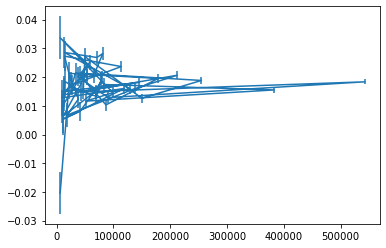

In [42]:
plt.errorbar(flat_state_sex_method["TOTAL"], flat_state_sex_method.RATIODIFF, yerr =flat_state_sex_method.Stddevratio["M"] )


Text(0.5, 1.0, 'Difference, male to female cesarian delivery rate')

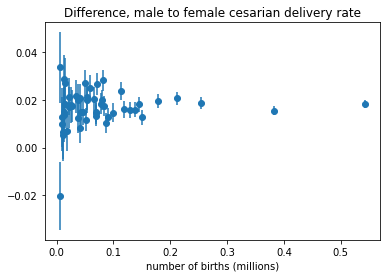

In [43]:
# Ah, turn off the connecting lines, please
plt.errorbar(flat_state_sex_method["TOTAL"]/1E6, flat_state_sex_method.RATIODIFF, 
             yerr =1.96* flat_state_sex_method.Stddevratio["M"], fmt="o" )
plt.xlabel("number of births (millions)")
plt.title("Difference, male to female cesarian delivery rate")


In [44]:
# Ok, there is a definitive difference between the Caesarian delivery rates for 
# boys and girls.  This is analogous to the sex ratio statistic.. a small difference
# that can be seen in large populations. 

# In fact, it is so much like the sex ratio statistic that I probably won't use it in class.

I have another question:  is there a weight difference between boys and girls at birth? 

In [45]:
bigdf.groupby(["SEX"]).WEIGHTGRAMS.mean()

SEX
F    3234.061310
M    3345.402588
Name: WEIGHTGRAMS, dtype: float64

In [46]:
bigdf.groupby(["SEX"]).WEIGHTGRAMS.std()

SEX
F    584.339256
M    613.126075
Name: WEIGHTGRAMS, dtype: float64

In [47]:
bigdf.groupby(["SEX"]).WEIGHTGRAMS.count()

SEX
F    1997707
M    2094772
Name: WEIGHTGRAMS, dtype: int64

In [48]:
1997707+2094772

4092479

In [49]:
# Let's stare at this for a moment.  
# We have a population, the population mean and standard deviation for the 
# birth weight statistic.
# Is there sexual dimorphism here?  

In [50]:
# If there is, it's pretty small 
613.12 - 584.33
# 29 grams? 

28.789999999999964

In [51]:
# overall standard deviation birth weights 
bigdf.WEIGHTGRAMS.std()

601.8256864847954

In [52]:
# 29 grams, that's one twentieth of a standard deviation and less than 1% of weight.  

In [53]:
# So, would sampling uncertainty do this? 

Calculate standard error of the mean (population standard deviation is known here):

$$ SEM = \sqrt{ \sigma \over N } = \sqrt{ (601.8g)^2 \over 4.09\times 10^6}  $$

In [54]:
601.8 / np.sqrt(4.09E6)

0.2975709485780707

Yikes.  With a population census of 4 million births, I could expect to see a difference 
in means of six tenths of a gram, 1/1000 of a standard deviation, between groups. 

How large does my sample need to be before a difference of 29 grams on a 601 gram standard deviation will become evident?  


$$ d  = 1.96 \sqrt{ \sigma \over N } $$
$$ N = (601.8g)^{2} ({1.96 \over 29g})^2  $$

In [55]:
601.8**2 * 1.96**2 / 29**2

1654.3237845231863

In [56]:
# Well that's more like it.  
# If we assume the differences are what we saw in the (one-year) census data,
# this is an effect large enough for Northwestern University to see in a year (12,000 births),
# but too small for U of C hospitals (1,600 births)


Statistical significance depends on the relationship between effect size and 
sample size.  The CDC birth census shows us that if you have 4 million births, 
you can see even small differences in a statistic between groups.  (Thanks, 
Central Limit Theorem.)

In [57]:
bigdf.groupby(["TOBACCOUSE"]).WEIGHTGRAMS.count()

TOBACCOUSE
      225045
1     354977
2    2957136
9     555321
Name: WEIGHTGRAMS, dtype: int64

In [58]:
 354977/(2957136+ 354977)   # smoker / nonsmoker 

0.10717538924547562

In [59]:
bigdf.groupby(["TOBACCOUSE"]).WEIGHTGRAMS.mean()

TOBACCOUSE
     3333.717408
1    3105.684571
2    3302.983319
9    3328.721012
Name: WEIGHTGRAMS, dtype: float64

In [60]:
# 1 = TOBACCO yes
# 2 = TOBACCO no
3302.98- 3105.68
# 200-gram difference in means!
# How large a sample... 

197.30000000000018

In [61]:
601.8**2 * 1.96**2 /197.3**2

35.740641148767345

In [62]:
# This is a huge effect, one third of a standard deviation.
# An effect so large I will probably see it in a sample of 36 smokers! 

<AxesSubplot:xlabel='SEX'>

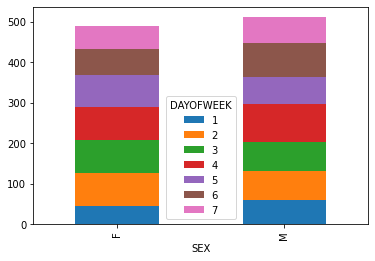

In [63]:
# If I want a stacked bar in one step:
# https://stackoverflow.com/questions/34917727/stacked-bar-plot-by-grouped-data-with-pandas
# df.groupby(['feature1', 'feature2']).size().unstack().plot(kind='bar', stacked=True)
df.groupby(["SEX", "DAYOFWEEK"]).MATERNALAGE.count().unstack().plot(kind='bar', stacked=True)

<AxesSubplot:xlabel='DAYOFWEEK'>

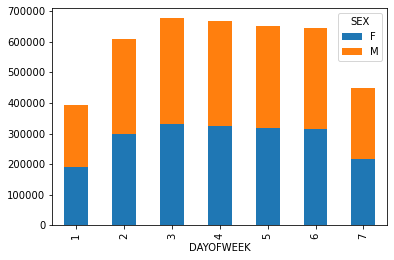

In [67]:
# Well that's not useful.

bigdf.groupby([ "DAYOFWEEK","SEX"]).MATERNALAGE.count().unstack().plot(kind='bar', stacked=True)

<AxesSubplot:xlabel='DAYOFWEEK'>

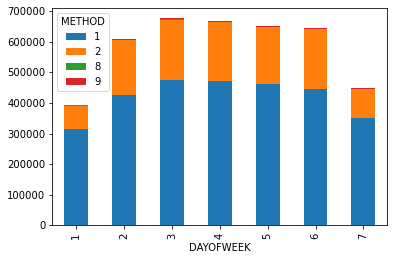

In [68]:
bigdf.groupby([ "DAYOFWEEK","METHOD"]).MATERNALAGE.count().unstack().plot(kind='bar', stacked=True)

In [ ]:
# I suspect there is a (detectable) sex-by-day-of-the-week effect, but
# have not chased it down yet.
